<a href="https://colab.research.google.com/github/EMcoding17/ExtraccionConocimientosDeBD/blob/main/Actividad07/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic**
#**Extraccion de conocimientos de base de datos**
# **Romero Sosa Emma Yuridia**
# **IDGS 91**

---



# **Importar librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

pd.options.display.max_columns = 10

# **Cargar Dataset**

In [2]:
#Cargar dataset desde github
!wget https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad07/titanic.csv
df = pd.read_csv("titanic.csv",delimiter=',',header='infer')

--2021-12-02 14:06:19--  https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad07/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22018 (22K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  21.50K  --.-KB/s    in 0s      

2021-12-02 14:06:19 (89.1 MB/s) - ‘titanic.csv’ saved [22018/22018]



In [3]:
#Mostrar forma del dataframe
df.shape

(887, 7)

In [4]:
#Mostrar los primeros 5 registros
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
#Mostrar los ultimos 5 registros
df.tail()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
882,0,2,male,27.0,0,0,13.00
883,1,1,female,19.0,0,0,30.00
884,0,3,female,7.0,1,2,23.45
885,1,1,male,26.0,0,0,30.00
886,0,3,male,32.0,0,0,7.75


In [6]:
#Mostrar la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


# **Limpieza de datos**

In [7]:
#Obtener la suma de los datos faltantes de cada columna
df.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age                 0
Siblings/Spouses    0
Parents/Children    0
Fare                0
dtype: int64

## **Columna: Feature Engineering**

In [8]:
# Asignar como True cuando el valor sea 'male'
df['Male'] = df['Sex'] == 'male'

In [9]:
# Mostrar dataframe modificado
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


In [10]:
#Sumar el total de datos que se asigno como True para male
df['Male'].sum()

573

# **Graficar datos**

Text(0, 0.5, 'Age')

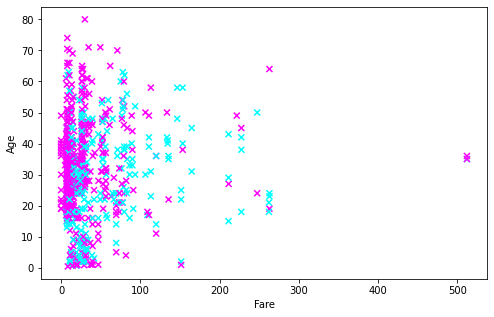

In [80]:
plt.figure(figsize=(8,5))
#Se grafican las columnas Fare con relacion a Age y se muestra por color segun sea la columna Male
plt.scatter(df['Fare'], df['Age'], c=df['Male'], marker='x', cmap="cool")
plt.xlabel('Fare')
plt.ylabel('Age')

# **Separar caracteristicas y objetivo**

In [12]:
X = df[['Pclass', 'Age', 'Siblings/Spouses',	'Parents/Children',	'Fare',	'Male']].values
Y = df['Survived'].values


In [13]:
# Mostrar el array de X
X

array([[3, 22.0, 1, 0, 7.25, True],
       [1, 38.0, 1, 0, 71.2833, False],
       [3, 26.0, 0, 0, 7.925, False],
       ...,
       [3, 7.0, 1, 2, 23.45, False],
       [1, 26.0, 0, 0, 30.0, True],
       [3, 32.0, 0, 0, 7.75, True]], dtype=object)

In [14]:
# Mostrar el array de Y
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

# **Configurar el modelo**

In [15]:
model = LogisticRegression()

# **Dividir en Train y Test**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1234)

# **Entrenamiento del modelo**

In [17]:
model.fit(X_train, Y_train)

LogisticRegression()

# **Predicciones**

In [18]:
y_pred = model.predict(X_test)

# **Analizar las predicciones**

In [19]:
X_test.shape

(178, 6)

In [20]:
#Mostrar todos los registros
X_test[0:9]

array([[3, 19.0, 0, 0, 7.8958, True],
       [3, 22.0, 0, 0, 7.8958, True],
       [1, 47.0, 1, 1, 52.5542, False],
       [2, 29.0, 0, 0, 10.5, True],
       [3, 18.0, 0, 0, 7.7958, True],
       [3, 39.0, 0, 0, 7.925, True],
       [3, 14.0, 5, 2, 46.9, True],
       [2, 24.0, 1, 2, 65.0, False],
       [3, 36.0, 1, 0, 15.55, True]], dtype=object)

In [21]:
#Datos esperados
Y_test[9:20]

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [22]:
#Datos obtenidos
y_pred[9:20]

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

En este caso solo dos valores obtenidos no coincidieron con los valores esperados

# **Probabilidad de predicción**

In [23]:
#Mostrar probabilidad de "no sobrevivio"
model.predict_proba(X_test)[9:20,0]

array([0.07951965, 0.89632751, 0.91037562, 0.29282373, 0.72591669,
       0.48655704, 0.87166001, 0.13670495, 0.71597703, 0.93827604,
       0.75619016])

In [24]:
#Mostrar probabilidad de "sobrevivio"
model.predict_proba(X_test)[9:20,1]

array([0.92048035, 0.10367249, 0.08962438, 0.70717627, 0.27408331,
       0.51344296, 0.12833999, 0.86329505, 0.28402297, 0.06172396,
       0.24380984])

In [25]:
#Total de personas
personas = Y.shape

In [26]:
#Total de sobrevivientes
sobrevivientes = Y.sum()

In [27]:
no_sobrevivio = (sobrevivientes/personas)*100
print("Existe una probabilidad que el ", no_sobrevivio[0], "% de personas no haya sobrevivido")

Existe una probabilidad que el  38.55693348365276 % de personas no haya sobrevivido


# **Metricas**

Accuracy = numero de predicciones correctas / total de predicciones

In [28]:
y_pred == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,

In [29]:
#Total de valores correctos
(y_pred == Y_test).sum()

145

In [30]:
#Exactitud del modelo
accuracy = (y_pred == Y_test).sum() / Y_test.shape
accuracy

array([0.81460674])

El modelo cuenta con un 81% de exactitud

# **Matriz de confusión**
Exactitud del modelo

In [35]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[95, 15],
       [18, 50]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


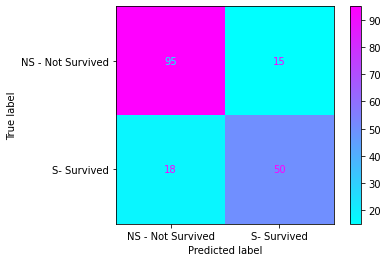

In [79]:
labels =["NS - Not Survived", "S- Survived"]
plot_confusion_matrix(model, X_test, Y_test, display_labels=labels, cmap="cool")

* **NS + NS =** Predichos correctamente
* **NS + S =** Predichos como NS pero realmente no lo son
* **S + NS =** Predichos como S pero realmente son NS
* **S + S =** Predichos correctamente

In [37]:
print(classification_report(Y_test, y_pred, target_names=labels))

                   precision    recall  f1-score   support

NS - Not Survived       0.84      0.86      0.85       110
      S- Survived       0.77      0.74      0.75        68

         accuracy                           0.81       178
        macro avg       0.80      0.80      0.80       178
     weighted avg       0.81      0.81      0.81       178



> **Nota:** *f1-score* es la media de la *precision* y el *recall*

# **Accuracy: Matriz de confusion**

accuracy = suma de presicciones correctas / total de predicciones

In [72]:
pred_correctas = cm[0][0] + cm[1][1]
pred_totales = cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]
accuracy_matriz = pred_correctas / pred_totales
accuracy_matriz

0.8146067415730337

# **Precision**

*¿Qué proporción de identificaciones positivas fue realmente correcta?*

Precision = positivos predichos correctamente / predicciones positivas

In [49]:
precision = cm[1][1] / (cm[1][1] + cm[0][1])
precision

0.7692307692307693

# **Recall**

¿Qué proporción de positivos reales se identificaron correctamente?

Recall = True positive / (True positive + False Negative)

In [50]:
recall = cm[1][1] / (cm[1][1] + cm[1][0])
recall

0.7352941176470589

# **F1_score**

Es el promedio de precision y recall

f1_score = 2 * ((precision*recall) / (precision + recall))

In [51]:
f1 = 2*((precision*recall) / (precision+recall))
f1

0.7518796992481205

# **SKLearn Metrics**

Comparar resultados manuales con los devueltos por el classification_report

In [53]:
#Accuracy
print("Accuracy: {} : {}".format(accuracy_matriz, accuracy_score(Y_test,y_pred)))

Accuracy: 0.8146067415730337 : 0.8146067415730337


In [55]:
#Precision
print("Precision: {} : {}".format(precision, precision_score(Y_test,y_pred)))

Precision: 0.7692307692307693 : 0.7692307692307693


In [56]:
#Recall
print("Recall: {} : {}".format(recall, recall_score(Y_test,y_pred)))

Recall: 0.7352941176470589 : 0.7352941176470589


In [57]:
#F1_score
print("F1_score: {} : {}".format(f1, f1_score(Y_test,y_pred)))

F1_score: 0.7518796992481205 : 0.7518796992481205


In [58]:
#Mostrar valores
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



# **Cambiar el umbral (Thresold)**

Cambiar a que clase pertenece

In [70]:
#Cambiar sesgo indicar que la persona sobrevivio si su probabilidad es mayor a 0.75
y_pred2=model.predict_proba(X_test)[:,1] >= 0.60
(y_pred2).sum()

55

In [71]:
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        68

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178





---

# **Conclusión**

Durante esta actividad aprendimos sobre feature engineering que se basa en seleccionar y transformar columnas categoricas para convertirlas a columnas numericas, dondole un mayor valor a nuestros modelos predictivos.

Por otro lado, analizamos la matriz de confusion y la funcion classification_report, además, aprendimos a realizar las formulas para acurracy, precisión, recall y f1_score.

Finalmente, realizamos un Thresold o cambio de umbral, que se basa en cambiar el sesgo del modelo predictivo, para mejorar los niveles de probabilidad.